# Regression Analysis

Regression analysis is a statistical technique that allows us to determine the relationship between two or more quantitative variables in order to predict a response or outcome variable from one or more of them. This methodology is frequently employed in a variety of fields, including business, social and behavioral sciences, biology, and many more. 

Here are a few examples of applications:

1. In  business, the relationship between product sales and advertising expenditures can be used to forecast product sales.

2. A financial firm may wish to know the top five causes that drive a customer to default in order to reduce risk in their portfolio.

3. A automobile insurance firm might use expected claims to Insured Declared Value ratio to create a suggested premium table using linear regression. The risk might be calculated based on the car's characteristics, the driver's information, or demographics.

The goal of regression is to create a model that expresses the relationship between a response ${\displaystyle Y_{i}} \in  R^n$ and a set of one or more (independent) variables ${\displaystyle X_{i}} \in  R^n$. We can use the model to predict the response ${\displaystyle Y_{i}}$ based on the factors (or variables).

The following elements are included in regression models:

* The unknown parameters, which are frequently denoted as a scalar or vector $\beta$.

* The independent variables, which are observed in data and are frequently expressed as a vector  ${\displaystyle X_{i}}$ (where  ${\displaystyle i}$ denotes a data row).

* The dependent variable, which can be seen in data and is frequently represented by the scalar $Y_{i}$.

* The error terms, which are not readily visible in data and are frequently represented by the scalar $e_{i}$.

Most regression models propose that $Y_{i}$ is a function of $X_{i}$ and $\beta$, 

$${\displaystyle Y_{i}=f(X_{i},\beta )+e_{i}}.$$

In other words, regression analysis aims to find the function $f(X_{i},\beta)$ that best matches the data. The function's form must be supplied in order to do regression analysis. The form of this function is sometimes based on knowledge of the relationship between $X_{i}$ and $Y_{i}$. If such information is not available, a flexible or convenient form is adopted.

## Simple linear regression

The simplest model to consider is a linear model, in which the response ${\displaystyle Y_{i}}$ is linearly proportional to the variables ${\displaystyle X_{i}}$:

$${\displaystyle Y_{i}=\beta _{0}+\beta _{1}X_{i}+e_{i}}$$

## Insurance Premium Prediction: Example

For analysis, we used the Kaggle public dataset "Insurance Premium Prediction.". There are 1338 samples and 7 features.

We will learn how to predict insurance costs based on the features age, sex, bmi, children, smoking status, and region.

Let us start by loading the data and performing a preliminary analysis with df.info ()

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import pearsonr,spearmanr

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
df = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/insuranceKaggle.csv')

Exploration of the dataset is always a good practice.

We will use charges as the dependent variable and the other variables as independent variables, which means we will have to predict charges based on the independent variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In out data set, types of variables are as follows:

* categorical variables: sex, smoker, region

* numerical variables: age, bmi, children, expenses

There is no missing data among 1338 records.

#### Exploratory data analysis

It is now time to experiment with the data and make some visualizations.

In our dataset, a **pairplot** plots pairwise relationships. The pairplot function creates a grid of Axes in which each variable in the data is shared across a single row and a single column on the y-axis.

A pairs plot shows the distribution of single variables as well as the relationships between them. Pair plots are a great way to detect trends for further study, and they're simple to create in Python!

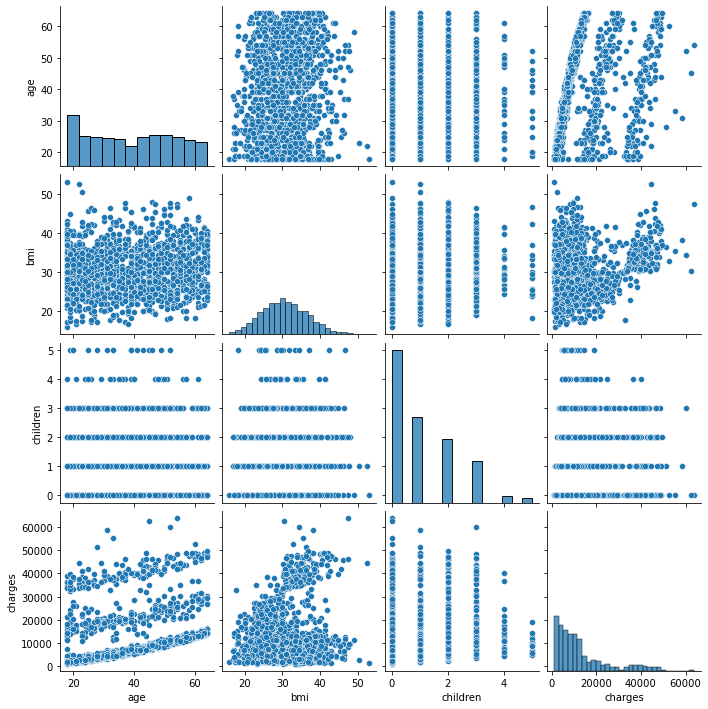

In [75]:
sns.pairplot(df)

#### Make a research question

For our first regression analysis, we are interested in the following question.

> Is there an association between charges and age?

The normal error regression model will be used to determine the linear relationship:
$${\displaystyle Y_{i}=\beta _{0}+\beta _{1}X_{i}+e_{i}}$$
    

We need to define a null hypothesis and an alternative hypothesis before we can run the numbers:

H0 (null hypothesis): There is no linear relationship between charge and age;

H1 (Alternative hypothesis): There is a linear relationship between charge and age.

If this hypothesis is accepted, one should discard the $X$ information and base inferences on the $Y$ values alone (so $Y_i = \bar{Y}$).


#### Running and reading a simple linear regression

**statsmodels** is a Python package that may be used to fit a variety of statistical models, run statistical tests, and explore and visualize data. Other libraries contain Bayesian methods and machine learning models, whereas Statsmodels contains more "traditional" frequentist statistical approaches.

In statsmodels, there are various types of linear regression models, ranging from the most basic (e.g., ordinary least squares) to the most complicated (e.g., logistic regression) (e.g., iteratively reweighted least squares).

In what follows, we will use Python's statsmodels module to implement **Ordinary Least Squares(OLS) method** of linear regression.

The main interfaces for linear models in statsmodels are array-based and formula-based. These can be accessible via the following API module imports:

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
model1 = smf.ols(formula='charges ~ age', data=df).fit()

* smf calls the package Statsmodel

* ols command indicates that we're employing an Ordinary Least Square (OLS) regression (a type linear regression)

* formula= is a formula that is used to write the dependent as well as all of the independent variables (s)

* dependent variable/outcome: first variable within the parenthesis before "~": Our only dependent variable is the first one. This is our result, the variable that defines the type of regression to use and the one that will be linked to all other covariates.

* ~ inside parenthesis: Creates a division between the outcome (dependent variable) on the left and the covariates (independent variables) on the right.

* independent covariates/independent variables: All other variables after the "," inside parenthesis, are independent covariates/independent variables.

* The + symbol is used to differentiate various independent variables within the same model (helpful for multivariable models, aka many variables).

* ,data= is used to specify the data frame's name.

* fit() tell Python that we want to fit our function ("run the function").

#### Interpreting the results

To view the results of the model, you can use `summary()` function:

In [6]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           4.89e-29
Time:                        09:11:43   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.0

We can see some important general data about the model on the upper half of the output.

On the left, we can observe

* The dependent variable is charges.

* We are running an ordinary least square (OLS) regression model.

* We included 1338 observations (patients).

We can notice some key information about the model diagnosis in the right column:

* **Determination coefficient** (R-squared) tells us the fraction (%) of variation in the response variable Y that can be explained by the predictor variable X. Its value goes from 0 (no predictability) to 1 (100 percent), indicating total predictability. A high R-squared means that the response variable may be predicted with less error.

In our example, R-squared = 0.089, indicating that the model explains 9 percent of the outcome variability. 

**Note** also that the low R-squared graph shows that even noisy, high-variability data may have a significant trend. The trend indicates that the predictor variable still provides information about the response even though data points fall further from the regression line.

* **The F-statistic value** is the outcome of a test in which the null hypothesis is that all regression coefficients are equal to zero. To put it another way, the model has no predictive capability.  

Essentially, the F-test compares your model against a model with no predictor variables (the intercept alone model) to see if adding coefficients improved the model. If you get a significant result, it means that the coefficients you added to your model enhanced its fit.

First, check your p-value. You can reject the null hypothesis if the p-value is small (less than your alpha level). Only then should you consider the f-value. If you don’t reject the null, ignore the f-value.

Prob (F-statistic), which here is <0.05, indicates that our linear regression model provides a better fit to the data than a model that contains no independent variables.

Regarding the output on the bottom half, we will read the output one column at a time. We are looking at the association between our charges and our independent variable, age (first column), 

*  **Age coefficient** represents the change in the output Y (charges) due to a change of one unit in age. The age coefficient in this case is  257.7226.

* **std err** reflects the level of accuracy of the coefficients. The lower the standard error is, the higher is the level of accuracy.  The results shows the standard error of the coefficient of 22.502. 

* P >|t| is our p-value with a t-ratio (for a t-distribution) of 11.453 (fourth column). A **p-value** of less than 0.05 is considered to be statistically significant.

* **Confidence Interval** represents the range in which the (age) coefficient is likely to fall, i.e. corresponding to a 95% confidence interval for the age coefficient between 213.579 and 301.866.

For the Intercept, this is the y-intercept of the regression equation, with a value of 3165.8850. You can plug this into your regression equation if you want to predict charges across the range of age that you have observed:



**Note:** we will not partition our data into training and testing because we are conducting an observational study to observe/test an association rather than constructing a predictive model. As a result, do not be surprised if this method differs from what you'll find in most data science classes.

#### Presenting the results

From our analysis, we found that the regression coefficients are 
$$\beta_0 = 3165.885006 \text{ and } \beta_1 = 257.722619.$$

The estimated regression function is 
$$ \hat{Y} = 3165.885 + 257.7226X. $$

When reporting your results, include the estimated effect (i.e. the regression coefficient), standard error of the estimate, and the p-value, we should additionally explain what your regression coefficient means to your viewers by interpreting your your regression coefficient means:

Age and charges have a significant relationship (p < 0.001), with a 257.7226-unit (95% CI of $\beta_1$: 257.7226 $\pm$ 22.502) increase in charges for each increase in age.

It is also a good idea to provide a graph with your findings. You can plot the observations on the x and y axes and then add the regression line and regression function for a simple linear regression:


In [13]:
# Model parameters

model1.params

model1.tvalues

Intercept     3.378207
age          11.453122
dtype: float64

#### Predicted values and residuals

We can compute predicted values given the estimated model parameters using `predict` function. In what follows, we calculate the predicted values and use them to calculate the residuals.

Recall that the $i$th residual is the difference between the observed value $Y_i$ and the corresponding fitted value $\hat{Y_i}$.

In [12]:
x=df[['age']]
y=df[['charges']]

predictions = model1.predict(x)
df['slr_result'] = predictions

df['slr_error'] =  df['charges'] - df['slr_result']

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [80]:
df

,age,sex,bmi,children,smoker,region,charges,slr_result,slr_error
0,19,female,27.900,0,yes,southwest,16884.92400,8062.614761,8822.309239
1,18,male,33.770,1,no,southeast,1725.55230,7804.892142,-6079.339842
2,28,male,33.000,3,no,southeast,4449.46200,10382.118329,-5932.656329
3,33,male,22.705,0,no,northwest,21984.47061,11670.731422,10313.739188
4,32,male,28.880,0,no,northwest,3866.85520,11413.008803,-7546.153603
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,16052.015939,-5451.467639
1334,18,female,31.920,0,no,northeast,2205.98080,7804.892142,-5598.911342
1335,18,female,36.850,0,no,southeast,1629.83350,7804.892142,-6175.058642
1336,21,female,25.800,0,no,southwest,2007.94500,8578.059998,-6570.114998


/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/Users/Kaemyuijang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


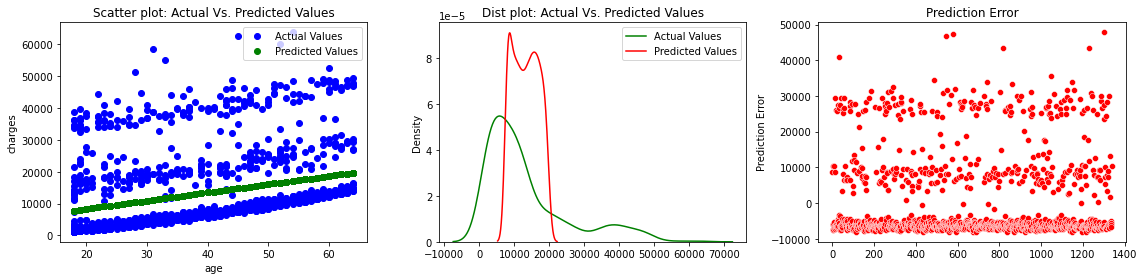

In [81]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x['age'], y,'bo',label='Actual Values')
axes[0].plot(x['age'], predictions,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("age")
axes[0].set_ylabel("charges")
axes[0].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=y.index,y='slr_error',data=df,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

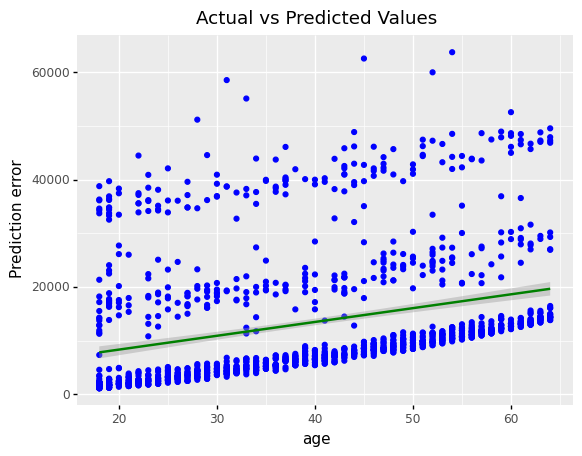

<ggplot: (309078585)>

In [82]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *

%matplotlib inline

(
    ggplot(df, aes(x='age', y='charges'))
    + geom_point(color='blue')
    + geom_smooth(method='lm',color='green')
    + labs(y='Prediction error', title = 'Actual vs Predicted Values')
    + scale_fill_manual(
    values = ['Actual values','Predicted values'],
    name = " ", labels = ['Actualvalues','Predicted values'] )
)

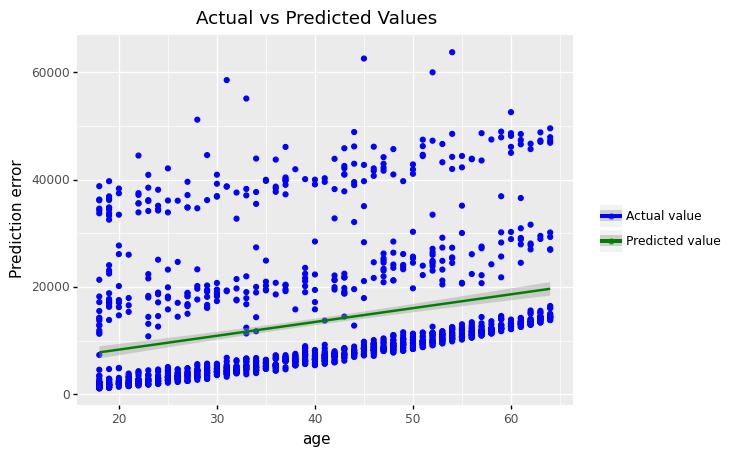

<ggplot: (309909181)>

In [94]:
(
    ggplot(df,aes(x='age',y='charges', color='"Actual value"'))
    + geom_point()
    + geom_smooth(mapping = aes(color='"Predicted value"'), method='lm')
    + labs(y='Prediction error', title = 'Actual vs Predicted Values')
    #+ scale_fill_manual(
    #values = ['Actual values','Predicted values'],
    #name = " ", labels = ['Actual values','Predicted values'] )
    + scale_color_manual(values = ["blue", "green"], # Colors
        name = " ") # Remove the legend title
    
)

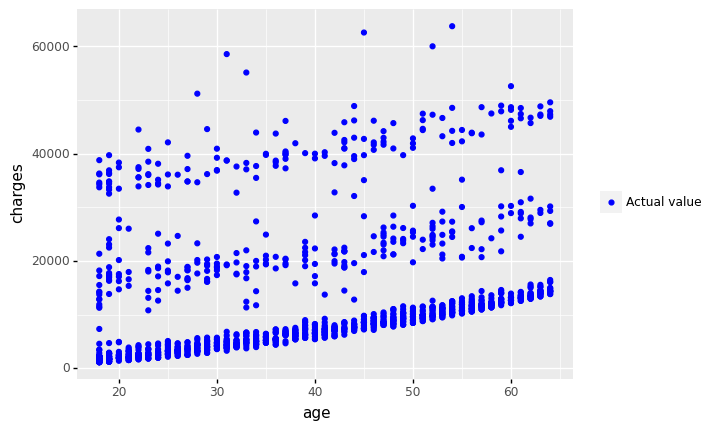

<ggplot: (310016773)>

In [108]:
(
    ggplot(df)
    + geom_point(aes(x = 'age', y='charges',color='"Actual value"')) 
    + scale_color_manual(values = ["blue"], # Colors
        name = " ")
)

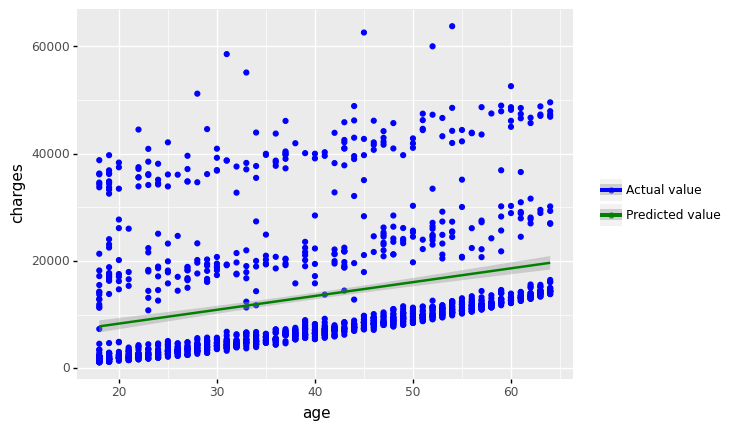

<ggplot: (310011901)>

In [107]:

(
    ggplot(df)
    + geom_point(aes(x = 'age', y='charges',color='"Actual value"')) 
    + geom_smooth(aes(x='age',y='charges',color='"Predicted value"'), method='lm')
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
)

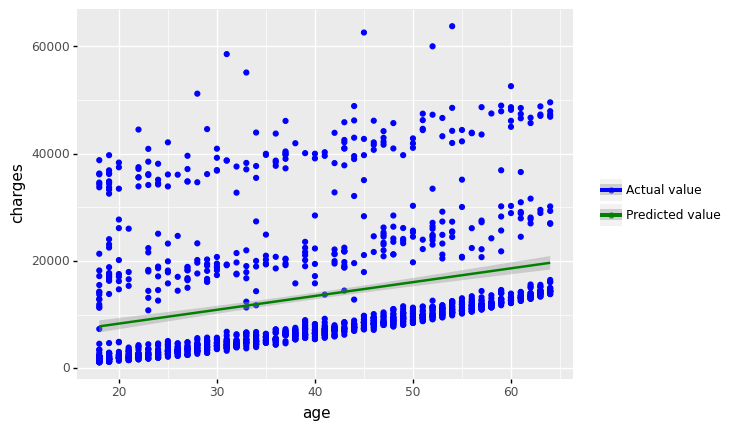

<ggplot: (313797561)>

In [118]:
(
    ggplot(df) + aes(x = 'age', y='charges')
    + geom_point(aes(color='"Actual value"')) 
    + geom_smooth(aes(color='"Predicted value"'), method='lm')
    + scale_color_manual(values = ['blue','green'], # Colors
        name = " ")
)

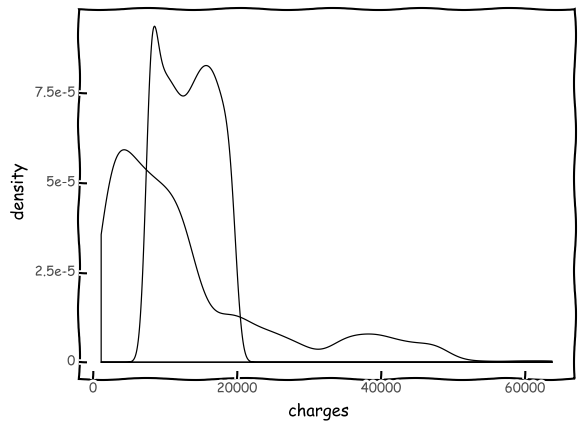

<ggplot: (313613309)>

In [116]:
(
    ggplot(df, aes(x='charges'))
    +  geom_density(aes(y=after_stat('density')))
    +  geom_density(aes(x='slr_result',y=after_stat('density')))
    + theme_xkcd()
)

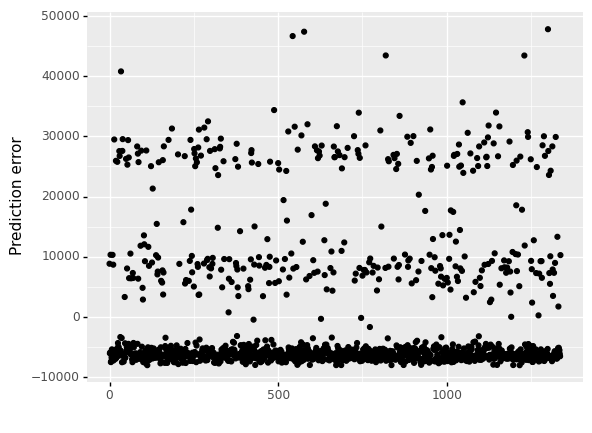

<ggplot: (312165777)>

In [120]:
(
    ggplot(df, aes(x='df.index'))
    +  geom_point(aes(y='slr_error'))
    + labs(x = ' ', y='Prediction error')
)

**Exercise** In this exercise, we will use the gapminder dataset. Our aim is to determine a relationship between life expectancy and year?

1. Plot life expectancy over time in a scatter plot.

2. Is there a general trend in life expectancy over time (e.g., increasing or decreasing)? Is this a linear trend? 

3. How would you characterize the distribution of life expectancy for individual years among countries? Is the data skewed or not? Is it better to be unimodal or multimodal? Is it symmetrical around the center? 

4. Fit a linear regression model using statsmodels.

5. Will you reject the null hypothesis of no association if I run a linear regression model of life expectancy vs. year (considering it as a continuous variable) and test for a relationship between year and life expectancy?

In [5]:
gapminder = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/gapminder_full.csv')

In [6]:
gapminder.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


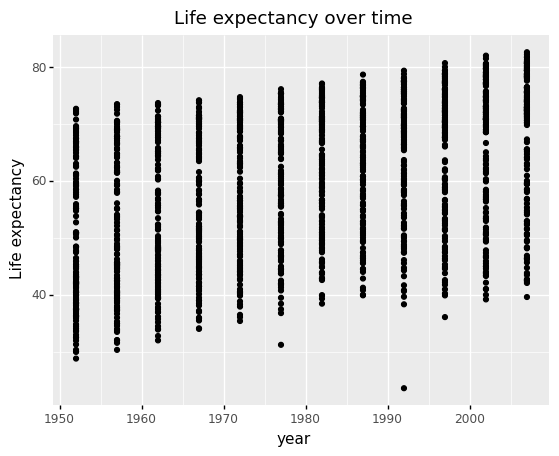

<ggplot: (309721681)>

In [14]:
(
    ggplot(gapminder) + 
    aes(x= 'year',y = 'life_exp') +
    geom_point()  +
    labs(x = 'year', y='Life expectancy', title = 'Life expectancy over time')
)

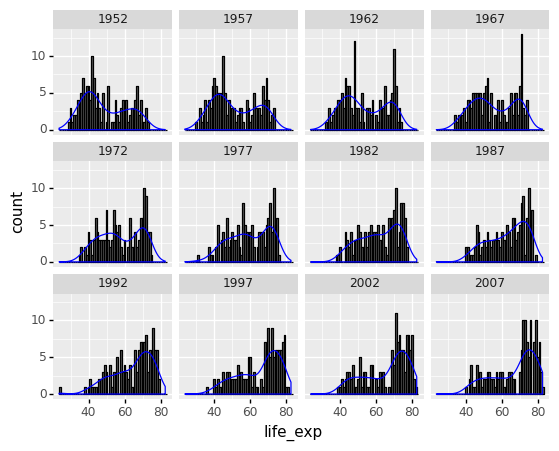

<ggplot: (308473473)>

In [10]:
(
    ggplot(gapminder) + 
    aes('life_exp') +
    geom_histogram(aes(y=after_stat('count')), binwidth = 1, color = 'black') +
    geom_density(aes(y=after_stat('count')),color='blue') +
    facet_wrap('year')
)

#### Violin plots

A **violin plot** displays the densities of different groups, allowing you to compare their distributions.

Violin plots are similar to box plots in that they display the probability density of the data at various values, which is normally smoothed using a kernel density estimator. Typically, a violin plot will include all of the data found in a box plot: a marker for the data's median; a box or marker representing the interquartile range; and, assuming the number of samples is not too large, all sample points.

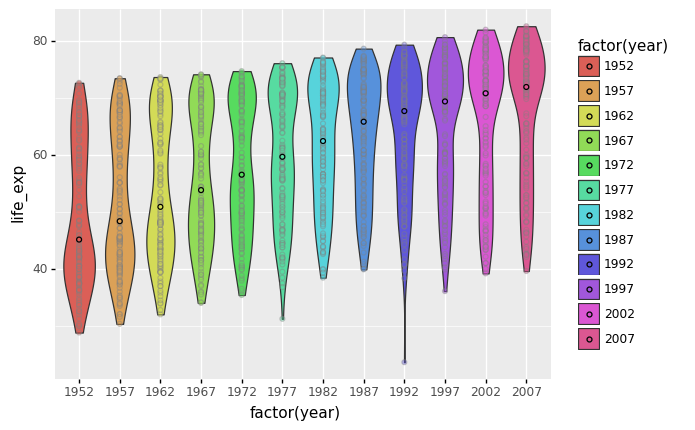

<ggplot: (309827293)>

In [35]:
# useful link: https://r-charts.com/distribution/violin-plot-mean-ggplot2/

(
    ggplot(gapminder) + 
    aes(x= 'factor(year)',y = 'life_exp', fill = 'factor(year)') + 
    geom_violin() +
    geom_point(color='gray',alpha=0.4) + 
    stat_summary(fun_y=np.median,
               geom = 'point',
               color = 'black')
)



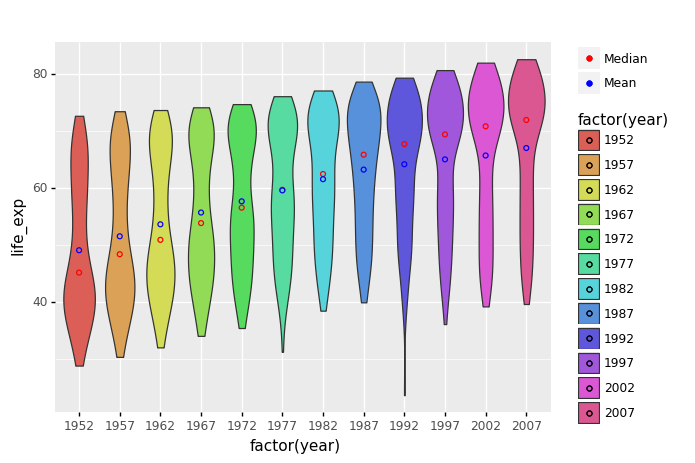

<ggplot: (309393113)>

In [57]:
(
    ggplot(gapminder) + 
    aes(x= 'factor(year)',y = 'life_exp', fill = 'factor(year)') + 
    geom_violin() +
    stat_summary(mapping=aes(color='"Median"'),
                 fun_y=np.median,
                 geom = 'point') +
    stat_summary(mapping=aes(color='"Mean"'),
                 fun_y=np.mean,
                 geom = 'point') +
    scale_color_manual(values = ["red", "blue"], # Colors
                name = " ") # Remove the legend title
)


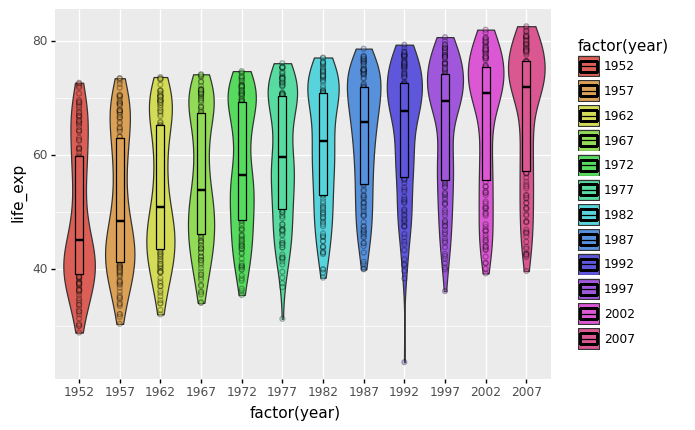

<ggplot: (312233373)>

In [72]:
(
    ggplot(gapminder) + 
    aes(x= 'factor(year)',y = 'life_exp', fill = 'factor(year)') + 
    geom_violin() +
    geom_point(alpha=0.3) + 
    stat_summary(fun_y=np.median,
                 fun_ymin=lambda x:  np.percentile(x,25),
                 fun_ymax=lambda x:  np.percentile(x,75),
               geom = 'crossbar',  # try pointrange
               color = 'black', width = 0.2)
)


In [113]:
model2 = smf.ols(formula='life_exp ~ year', data=gapminder).fit()

In [114]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           7.55e-80
Time:                        14:37:42   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.000    -649.031    -522.273
year           0.3259      0.016     19.965      0.000       0.294       0.358
==============================================================================
Omnibus:                      386.124   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.750
Skew:                          -0.268   Prob(JB):                     1.97e-20
Kurtosis:                       2.004   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""